In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [133]:
def tanh(x):
    return (np.e**(2*x) - 1)/(np.e**(2*x) + 1)

In [134]:
def d_tanh(x):
    return 1 - (tanh(x)**2)

In [135]:
def sigmoid(x):
    return 1/ (1 + np.e**(-x))

In [136]:
def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [92]:
np.random.seed(42)

In [93]:
x = np.random.randn(4)
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986])

In [105]:
y = 0.859

In [95]:
w1 = np.random.randn(4)
w1

array([-0.23415337, -0.23413696,  1.57921282,  0.76743473])

In [96]:
w2 = np.random.randn(4)
w2

array([-0.46947439,  0.54256004, -0.46341769, -0.46572975])

In [97]:
w3 = np.random.randn(4)
w3

array([ 0.24196227, -1.91328024, -1.72491783, -0.56228753])

In [98]:
wo = np.random.randn(3)
wo

array([-1.01283112,  0.31424733, -0.90802408])

In [99]:
bias = np.random.randn(4)
bias

array([-1.4123037 ,  1.46564877, -0.2257763 ,  0.0675282 ])

In [106]:
print(x)
print(w1)
print(w2)
print(w3)
print(wo)
print(bias)
print(y)

[ 0.49671415 -0.1382643   0.64768854  1.52302986]
[-0.23415337 -0.23413696  1.57921282  0.76743473]
[-0.46947439  0.54256004 -0.46341769 -0.46572975]
[ 0.24196227 -1.91328024 -1.72491783 -0.56228753]
[-1.01283112  0.31424733 -0.90802408]
[-1.4123037   1.46564877 -0.2257763   0.0675282 ]
0.859


In [151]:
def forward(x):
    a = np.dot(w1, x) + bias[0]
    sig_a = sigmoid(a)
    b = np.dot(w2, x) + bias[1]
    sig_b = sigmoid(b)
    c = np.dot(w3, x) + bias[2]
    sig_c = sigmoid(c)
    x_o = np.array([sig_a, sig_b, sig_c])
    o = np.dot(wo, x_o) + bias[3]
    z = sigmoid(o)
    return z

In [152]:
output = forward(x)
output

np.float64(0.36200500989047335)

In [157]:
L = y - z
L

np.float64(0.07824385953524493)

In [154]:
d_a = np.array([x[0], x[1], x[2], x[3], 1])
d_b = np.array([x[0], x[1], x[2], x[3], 1])
d_c = np.array([x[0], x[1], x[2], x[3], 1])
d_wo = np.array([d_sig_a, d_sig_b, d_sig_c, 1])

In [155]:
d_sig_a = d_sigmoid(a)
d_sig_b = d_sigmoid(b)
d_sig_c = d_sigmoid(c)
d_sig_wo = d_sigmoid(o)

In [206]:
a = 10

def b(a):
    return 3*(a**2) + 5*a + 10

def c(b):
    return b + 2*(b**-2)

def d(c):
    return c**2

In [207]:
def forward(a):
    return(d(c(b(a))))

print(forward(a))

129600.01111111137


In [208]:
h = 0.00001

In [209]:
print(forward(a+h))

129600.47911172976


In [211]:
sensitivity = (forward(a+h)-forward(a))/h
sensitivity

46800.06183916702

In [5]:
x1 = 3.0
x2 = 0.8

w1 = 0.5
w2 = 0.5

b = 3.5

y = 0.577

def forw():
    z = x1*w1 + x2*w2 + b
    y_pred = sigmoid(z)
    return y_pred

lr = 0.001   # smaller learning rate
epoch = 300

for i in range(epoch):
    for j in range(100):
        # forward
        z = w1*x1 + w2*x2 + b
        y_pred = sigmoid(z)

        # gradients
        dL_dypred = 2 * (y_pred - y)
        dypred_dz = d_sigmoid(z)
        
        dL_dw1 = dL_dypred * dypred_dz * x1
        dL_dw2 = dL_dypred * dypred_dz * x2
        dL_db  = dL_dypred * dypred_dz * 1

        # update
        w1 = w1 - lr * dL_dw1
        w2 = w2 - lr * dL_dw2
        b  = b  - lr * dL_db

    # track loss
    L = (y - y_pred)**2
    print(f"Epoch {i+1}, Loss: {L:.6f}, y_pred: {y_pred:.6f}")



y_pred= forw()
y_pred

Epoch 1, Loss: 0.175131, y_pred: 0.995486
Epoch 2, Loss: 0.175115, y_pred: 0.995468
Epoch 3, Loss: 0.175100, y_pred: 0.995450
Epoch 4, Loss: 0.175085, y_pred: 0.995431
Epoch 5, Loss: 0.175069, y_pred: 0.995413
Epoch 6, Loss: 0.175054, y_pred: 0.995394
Epoch 7, Loss: 0.175038, y_pred: 0.995375
Epoch 8, Loss: 0.175022, y_pred: 0.995357
Epoch 9, Loss: 0.175006, y_pred: 0.995337
Epoch 10, Loss: 0.174990, y_pred: 0.995318
Epoch 11, Loss: 0.174974, y_pred: 0.995299
Epoch 12, Loss: 0.174958, y_pred: 0.995279
Epoch 13, Loss: 0.174941, y_pred: 0.995259
Epoch 14, Loss: 0.174924, y_pred: 0.995240
Epoch 15, Loss: 0.174908, y_pred: 0.995220
Epoch 16, Loss: 0.174891, y_pred: 0.995199
Epoch 17, Loss: 0.174874, y_pred: 0.995179
Epoch 18, Loss: 0.174856, y_pred: 0.995158
Epoch 19, Loss: 0.174839, y_pred: 0.995138
Epoch 20, Loss: 0.174822, y_pred: 0.995117
Epoch 21, Loss: 0.174804, y_pred: 0.995096
Epoch 22, Loss: 0.174786, y_pred: 0.995074
Epoch 23, Loss: 0.174768, y_pred: 0.995053
Epoch 24, Loss: 0.17

0.5814654697496693

In [148]:
np.random.seed(42)
x = np.random.rand(100).tolist()
x

[0.3745401188473625,
 0.9507143064099162,
 0.7319939418114051,
 0.5986584841970366,
 0.15601864044243652,
 0.15599452033620265,
 0.05808361216819946,
 0.8661761457749352,
 0.6011150117432088,
 0.7080725777960455,
 0.020584494295802447,
 0.9699098521619943,
 0.8324426408004217,
 0.21233911067827616,
 0.18182496720710062,
 0.18340450985343382,
 0.3042422429595377,
 0.5247564316322378,
 0.43194501864211576,
 0.2912291401980419,
 0.6118528947223795,
 0.13949386065204183,
 0.29214464853521815,
 0.3663618432936917,
 0.45606998421703593,
 0.7851759613930136,
 0.19967378215835974,
 0.5142344384136116,
 0.5924145688620425,
 0.046450412719997725,
 0.6075448519014384,
 0.17052412368729153,
 0.06505159298527952,
 0.9488855372533332,
 0.9656320330745594,
 0.8083973481164611,
 0.3046137691733707,
 0.09767211400638387,
 0.6842330265121569,
 0.4401524937396013,
 0.12203823484477883,
 0.4951769101112702,
 0.034388521115218396,
 0.9093204020787821,
 0.2587799816000169,
 0.662522284353982,
 0.31171107608

In [149]:
sorted_x = []

while len(x) != 0:  
    for i in x:
        cur_gre = i
        for j in x:
            if j > cur_gre: 
                cur_gre = j
        sorted_x.append(cur_gre)
        x.remove(cur_gre)

In [150]:
sorted_x

[0.9868869366005173,
 0.9699098521619943,
 0.9695846277645586,
 0.9656320330745594,
 0.9507143064099162,
 0.9488855372533332,
 0.9394989415641891,
 0.9218742350231168,
 0.9093204020787821,
 0.8948273504276488,
 0.8872127425763265,
 0.8661761457749352,
 0.8631034258755935,
 0.8324426408004217,
 0.8287375091519293,
 0.8154614284548342,
 0.8083973481164611,
 0.8021969807540397,
 0.7851759613930136,
 0.7751328233611146,
 0.7722447692966574,
 0.7712703466859457,
 0.770967179954561,
 0.7607850486168974,
 0.7319939418114051,
 0.7296061783380641,
 0.7290071680409873,
 0.713244787222995,
 0.7080725777960455,
 0.7068573438476171,
 0.6842330265121569,
 0.662522284353982,
 0.6375574713552131,
 0.6232981268275579,
 0.6118528947223795,
 0.6075448519014384,
 0.6011150117432088,
 0.5986584841970366,
 0.5978999788110851,
 0.5924145688620425,
 0.5612771975694962,
 0.5467102793432796,
 0.5426960831582485,
 0.5247564316322378,
 0.5227328293819941,
 0.5200680211778108,
 0.5142344384136116,
 0.4951769101112

In [151]:
print(len(sorted_x))

100


In [156]:
rounded_x = []
for x_i in sorted_x:
    x_i = round(x_i, 2)
    rounded_x.append(x_i)

In [158]:
rounded_x

[0.99,
 0.97,
 0.97,
 0.97,
 0.95,
 0.95,
 0.94,
 0.92,
 0.91,
 0.89,
 0.89,
 0.87,
 0.86,
 0.83,
 0.83,
 0.82,
 0.81,
 0.8,
 0.79,
 0.78,
 0.77,
 0.77,
 0.77,
 0.76,
 0.73,
 0.73,
 0.73,
 0.71,
 0.71,
 0.71,
 0.68,
 0.66,
 0.64,
 0.62,
 0.61,
 0.61,
 0.6,
 0.6,
 0.6,
 0.59,
 0.56,
 0.55,
 0.54,
 0.52,
 0.52,
 0.52,
 0.51,
 0.5,
 0.49,
 0.47,
 0.46,
 0.44,
 0.43,
 0.43,
 0.39,
 0.37,
 0.37,
 0.36,
 0.36,
 0.33,
 0.33,
 0.33,
 0.31,
 0.31,
 0.3,
 0.3,
 0.29,
 0.29,
 0.28,
 0.27,
 0.26,
 0.21,
 0.2,
 0.2,
 0.2,
 0.18,
 0.18,
 0.18,
 0.17,
 0.16,
 0.16,
 0.14,
 0.14,
 0.12,
 0.12,
 0.12,
 0.11,
 0.1,
 0.09,
 0.07,
 0.07,
 0.07,
 0.06,
 0.06,
 0.05,
 0.05,
 0.03,
 0.03,
 0.02,
 0.01]

In [164]:
updated_x = rounded_x.copy()

for i in range(1, len(rounded_x)):
    if rounded_x[i] - rounded_x[i-1] <= 0.4:
        changed_value = rounded_x[i-1] + 0.2
        updated_x[i] = changed_value

In [165]:
print(updated_x)

[0.99, 1.19, 1.17, 1.17, 1.17, 1.15, 1.15, 1.14, 1.12, 1.11, 1.09, 1.09, 1.07, 1.06, 1.03, 1.03, 1.02, 1.01, 1.0, 0.99, 0.98, 0.97, 0.97, 0.97, 0.96, 0.9299999999999999, 0.9299999999999999, 0.9299999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.8800000000000001, 0.8600000000000001, 0.8400000000000001, 0.8200000000000001, 0.81, 0.81, 0.8, 0.8, 0.8, 0.79, 0.76, 0.75, 0.74, 0.72, 0.72, 0.72, 0.71, 0.7, 0.69, 0.6699999999999999, 0.66, 0.64, 0.63, 0.63, 0.5900000000000001, 0.5700000000000001, 0.5700000000000001, 0.56, 0.56, 0.53, 0.53, 0.53, 0.51, 0.51, 0.5, 0.5, 0.49, 0.49, 0.48000000000000004, 0.47000000000000003, 0.46, 0.41000000000000003, 0.4, 0.4, 0.4, 0.38, 0.38, 0.38, 0.37, 0.36, 0.36, 0.34, 0.34, 0.32, 0.32, 0.32, 0.31, 0.30000000000000004, 0.29000000000000004, 0.27, 0.27, 0.27, 0.26, 0.26, 0.25, 0.25, 0.23, 0.23, 0.22]


In [173]:
np.random.uniform(0, 1, 10)

array([0.91486439, 0.3701587 , 0.01545662, 0.92831856, 0.42818415,
       0.96665482, 0.96361998, 0.85300946, 0.29444889, 0.38509773])

In [2]:
x = np.linspace(-5, 5, 10)
y = np.random.uniform(-1, 1, 10)

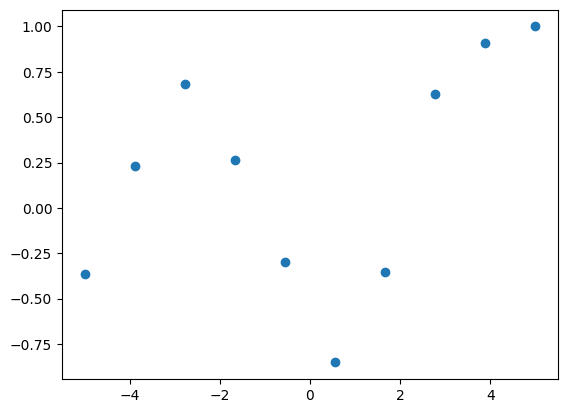

In [3]:
plt.scatter(x, y)

In [4]:
x = np.linspace(-5, 5, 100)
y = np.random.uniform(0, 1, 100)

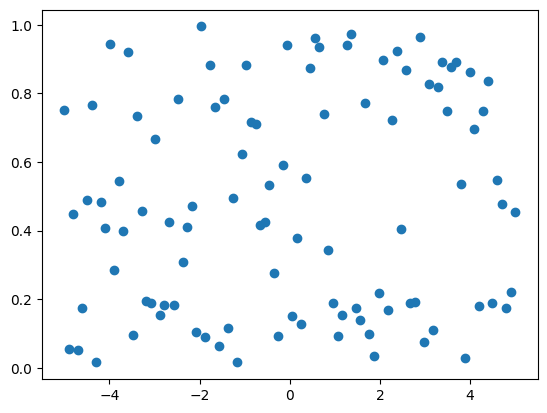

In [5]:
plt.scatter(x, y)

In [6]:
x = np.linspace(-5, 5, 500)
y = np.random.rand(500)

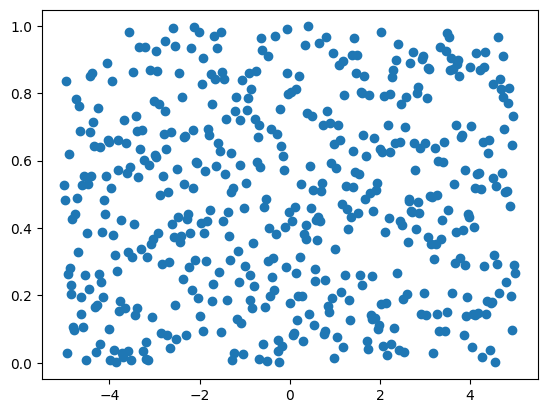

In [7]:
plt.scatter(x, y)

In [8]:
x = np.linspace(-5, 5, 250)
y = np.random.randn(250)

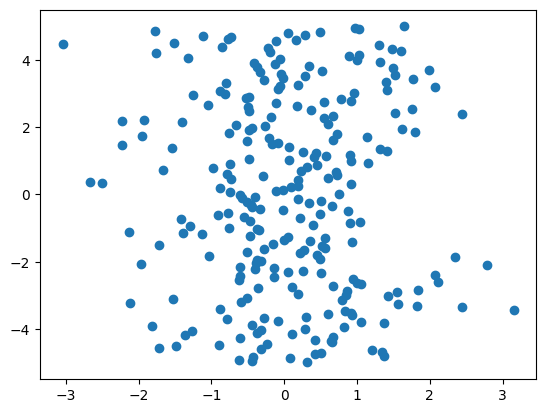

In [9]:
plt.scatter(y, x)

In [10]:
x = np.linspace(-5, 5, 500)
y = np.random.randint(100, size=500)

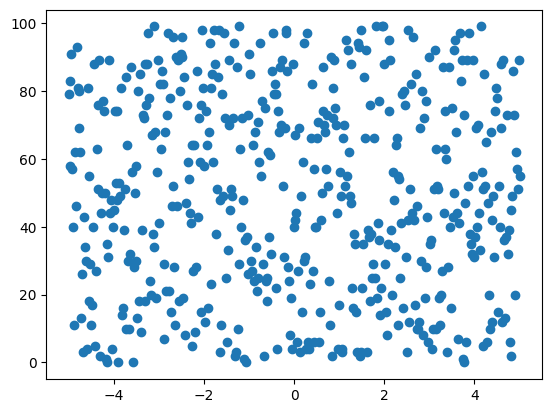

In [11]:
plt.scatter(x, y)

In [12]:
np.random.uniform(-0.05, 0.05, 1)[0]

np.float64(0.005677006625703029)

In [13]:
x = np.linspace(0, 1, 10)
points = []
for x_i in x:
    y = np.linspace(0, 1, 10) + np.random.uniform(-0.005, 0.08, 10)
    for y_i in y:
        points.append([x_i + np.random.uniform(-0.005, 0.08, 1)[0], y_i])

points = np.array(points)

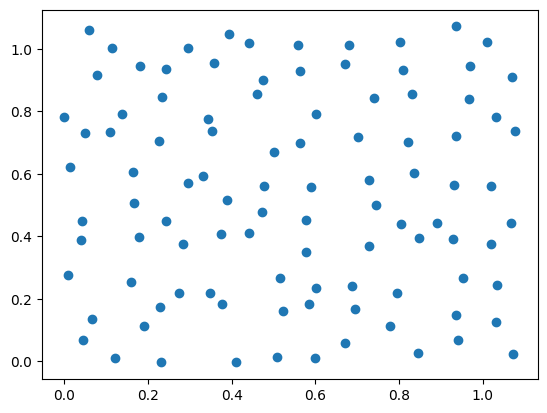

In [14]:
plt.scatter(points[:, 0], points[:, 1])

In [15]:
import pandas as pd
df = pd.DataFrame(points)
df.to_csv('scatter-points.csv', index=False)

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
import pandas as pd
df = pd.read_csv("scatter-points.csv")
points = df.to_numpy()

In [6]:
blue_points = points[points[:,0] < 0.4]
blue_points = blue_points[blue_points[:,1] > 0.6]
blue_points

array([[ 1.43922558e-02,  6.20535117e-01],
       [ 4.90688096e-02,  7.32256330e-01],
       [-4.45382762e-04,  7.83587757e-01],
       [ 7.76752547e-02,  9.16243939e-01],
       [ 5.80344384e-02,  1.05952167e+00],
       [ 1.63829004e-01,  6.07564921e-01],
       [ 1.09105153e-01,  7.33172229e-01],
       [ 1.36793376e-01,  7.93097221e-01],
       [ 1.79665223e-01,  9.44787091e-01],
       [ 1.12911634e-01,  1.00272322e+00],
       [ 2.26428058e-01,  7.06803101e-01],
       [ 2.32980825e-01,  8.45286617e-01],
       [ 2.43314650e-01,  9.34099742e-01],
       [ 2.94359486e-01,  1.00382860e+00],
       [ 3.52370219e-01,  7.37352359e-01],
       [ 3.44153908e-01,  7.76336596e-01],
       [ 3.56722150e-01,  9.55610465e-01],
       [ 3.92371480e-01,  1.04864216e+00]])

(-0.05, 1.15)

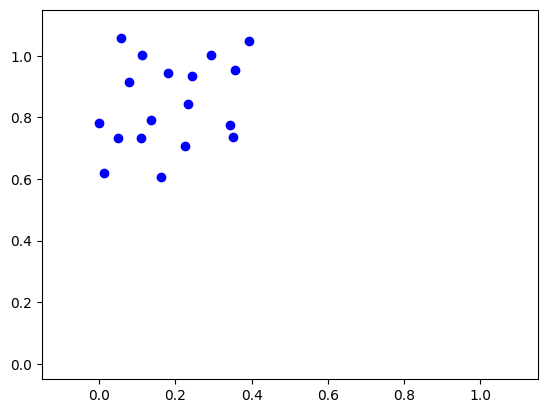

In [7]:
plt.scatter(blue_points[:,0], blue_points[:,1], color='blue')
plt.xlim(-0.15, 1.15)
plt.ylim(-0.05, 1.15)

In [8]:
mask = ~np.isin(points, blue_points).all(axis=1)
red_points = points[mask]
red_points

array([[ 0.04531427,  0.06796733],
       [ 0.06473172,  0.13577409],
       [ 0.00769037,  0.27796893],
       [ 0.03913065,  0.38939614],
       [ 0.0430464 ,  0.4502481 ],
       [ 0.12159864,  0.01036217],
       [ 0.19107559,  0.11410066],
       [ 0.15812699,  0.25332874],
       [ 0.17941997,  0.39894367],
       [ 0.16713303,  0.50791574],
       [ 0.23097108, -0.00352038],
       [ 0.22853833,  0.17433221],
       [ 0.27433542,  0.21984868],
       [ 0.28456946,  0.37403235],
       [ 0.24259039,  0.44859529],
       [ 0.29524062,  0.56965505],
       [ 0.40919619, -0.0014033 ],
       [ 0.37718229,  0.18521288],
       [ 0.34790792,  0.21981189],
       [ 0.37376182,  0.40862986],
       [ 0.38837815,  0.5157359 ],
       [ 0.33170812,  0.5919116 ],
       [ 0.50838969,  0.0142784 ],
       [ 0.52381411,  0.161414  ],
       [ 0.51552159,  0.26575455],
       [ 0.44176378,  0.41141589],
       [ 0.47269994,  0.47700368],
       [ 0.47659295,  0.56198696],
       [ 0.50193796,

(-0.05, 1.15)

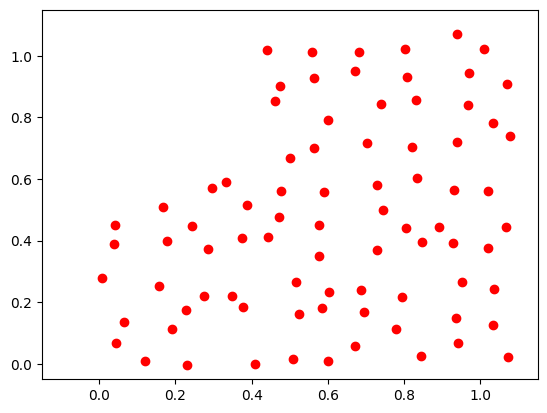

In [9]:
plt.scatter(red_points[:,0], red_points[:,1], color='red')
plt.xlim(-0.15, 1.15)
plt.ylim(-0.05, 1.15)

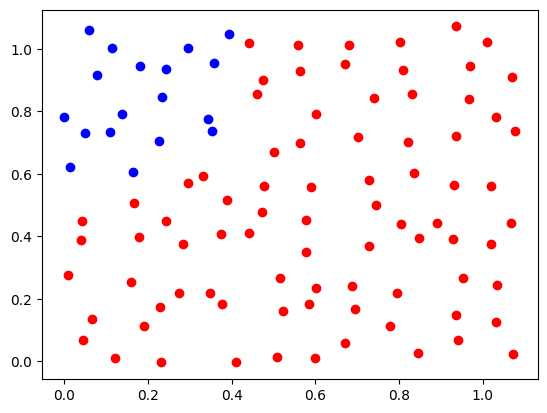

In [10]:
plt.scatter(blue_points[:,0], blue_points[:,1], color='blue')
plt.scatter(red_points[:,0], red_points[:,1], color='red')

In [11]:
y = []
for point in points:
    if point in red_points:
        y.append([0, 1])
    if point in blue_points:
        y.append([1, 0])

print(y)

[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]


In [12]:
class NeuralNetwork:
    def __init__(self, num_input_neurons, num_hidden_layers, num_output_neurons):
        self.num_input_neurons = num_input_neurons
        self.num_hidden_layers = num_hidden_layers
        self.num_output_neurons = num_output_neurons
        
        self.num_all_layer_neurons = []
        
        self.all_layer_values = []
        self.preact = []
        self.aftact = []
        
        self.weights = []
        self.bias = []
        
        self.weights_gradients = []
        self.bias_gradients = []
        

    def set_hidden_neurons(self):
        self.num_all_layer_neurons.append(self.num_input_neurons)
        for i in range(self.num_hidden_layers):
            self.num_all_layer_neurons.append(int(input(f"Hidden Layer {i+1}: ")))
        self.num_all_layer_neurons.append(self.num_output_neurons)
       
    def initialize_weights(self):
        if len(self.weights) == len(self.num_all_layer_neurons)-1:
            return None
        else:
            for i in range(len(self.num_all_layer_neurons)-1):
                self.weights.append(np.random.rand(self.num_all_layer_neurons[i], self.num_all_layer_neurons[i+1]))

    def initialize_bias(self):
        if len(self.bias) == len(self.num_all_layer_neurons)-1:
            return None
        else:
            for i in range(len(self.weights)):
                self.bias.append(np.random.rand(self.num_all_layer_neurons[i+1]))

    def tanh_activation(self, x):
        return (np.e**(2*x) - 1)/(np.e**(2*x) + 1)

    def d_tanh(self, x):
        return 1 - (self.tanh_activation(x)**2)

    def sigmoid_activation(self, x):
        return 1/ (1 + np.e**(-x))

    def d_sigmoid(self, x):
        return self.sigmoid_activation(x) * (1 - self.sigmoid_activation(x))
    
    def forward(self, input_vector):
        if len(self.all_layer_values) == len(self.num_all_layer_neurons) + 1:
            return self.all_layer_values[-1]
            
        output = input_vector
        self.all_layer_values.append(output)
        #print(f"Input: {output}")
        
        for i in range(len(self.weights)):
            if i == len(self.weights)-1:
                output = np.dot(output, self.weights[i]) + self.bias[i]
                self.all_layer_values.append(output)
                #print(f"Output Layer: {output}")
                
                output = self.sigmoid_activation(output)
                self.all_layer_values.append(output)
                #print(f"Output Layer after activation: {output}")
            else:  
                output = np.dot(output, self.weights[i]) + self.bias[i]
                self.all_layer_values.append(output)
                self.preact.append(output)
                #print(f"Layer {i+1}: {output}")
                
                output = self.tanh_activation(output)
                self.all_layer_values.append(output)
                self.aftact.append(output)
                #print(f"Layer {i+1} after activation: {output}")
                
        return self.all_layer_values[-1]

    def calculate_loss(self, y_true, y_pred):
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        loss = np.mean((y_true - y_pred) ** 2)
        return loss

    def clear_network(self):
        self.initialize_weights()
        self.initialize_bias()    

    def backward(self, y_true, y_pr):
        y_true = np.array(y_true).reshape(1, -1)
        y_pr = np.array(y_pred).reshape(1, -1)

        self.weights_gradients = []
        self.bias_gradients = []
        delta = 0

        delta = (y_pred - y_true) * self.d_sigmoid(self.all_layer_values[-2]).reshape(1, -1)
        
        for i in range(len(self.weights)):
            
            if i == len(self.weights)-1:
                input_layer = self.all_layer_values[0].reshape(1, -1)
                self.weights_gradients.append(np.dot(input_layer.T, delta))
                self.bias_gradients.append(delta)
                return None

            A_prev = self.aftact[-(i+1)].reshape(1, -1)
            Z_prev = self.preact[-(i+1)].reshape(1, -1)
            self.weights_gradients.append(np.dot(A_prev.T, delta))
            self.bias_gradients.append(delta)
            delta = np.dot(delta, self.weights[-(i+1)].T) * self.d_tanh(Z_prev)

    def update_weights(self, learning_rate):
        for i in range(len(self.weights_gradients)):
            self.weights[-(i+1)] = self.weights[-(i+1)] - (learning_rate*self.weights_gradients[i])
            self.bias[-(i+1)] = self.bias[-(i+1)] - (learning_rate*self.bias_gradients[i])   


In [13]:
nn = NeuralNetwork(2, 3, 2)
nn.set_hidden_neurons()

Hidden Layer 1:  5
Hidden Layer 2:  5
Hidden Layer 3:  5


In [14]:
nn.num_all_layer_neurons

[2, 5, 5, 5, 2]

In [15]:
nn.initialize_weights()
nn.initialize_bias()

In [16]:
weights = []
weights = nn.weights
for i in weights:
    print(i)
    print()

[[0.26233055 0.36135322 0.18288443 0.65860023 0.27415601]
 [0.74418019 0.83519811 0.17350246 0.845838   0.36786828]]

[[0.12014034 0.84488972 0.32537174 0.34051226 0.4475513 ]
 [0.34393731 0.19685639 0.81949444 0.39562397 0.0326012 ]
 [0.6081612  0.5003582  0.76822252 0.8476253  0.2429708 ]
 [0.65548264 0.02526313 0.50916347 0.03910979 0.50091253]
 [0.12328886 0.41230019 0.13132644 0.13486373 0.6088319 ]]

[[0.56219393 0.7976681  0.93711515 0.91455007 0.66714655]
 [0.48022011 0.66017289 0.7385683  0.97345063 0.19664557]
 [0.66533304 0.27738725 0.69280275 0.79779061 0.31075369]
 [0.85550931 0.36299092 0.68879042 0.23862084 0.42163104]
 [0.5964188  0.10431813 0.46559874 0.41599017 0.39471328]]

[[0.8482764  0.31180631]
 [0.98203707 0.4047818 ]
 [0.92797641 0.15753945]
 [0.43559014 0.3027448 ]
 [0.94298327 0.69938735]]



In [17]:
bias = nn.bias
for i in bias:
    print(i)

[0.61213329 0.6747766  0.42569502 0.89947362 0.05765047]
[0.87723564 0.23581811 0.60579589 0.20704445 0.99376576]
[0.19840345 0.29682201 0.15734958 0.26907489 0.35880317]
[0.17841045 0.67531913]


In [18]:
print(points[0])

[0.04531427 0.06796733]


In [19]:
y_pred = nn.forward(points[0])
print(y_pred)
nn.calculate_loss(y[0], y_pred)

[0.98608914 0.92564031]


np.float64(0.488950574323169)

In [20]:
nn.all_layer_values

[array([0.04531427, 0.06796733]),
 array([0.67460054, 0.74791724, 0.4457748 , 0.98680695, 0.09507668]),
 array([0.58799797, 0.63390476, 0.4184197 , 0.75599751, 0.09479122]),
 array([1.92759798, 1.12494079, 2.03540959, 1.05506681, 1.8156554 ]),
 array([0.9585388 , 0.80928064, 0.96644574, 0.78376844, 0.94840345]),
 array([3.00509611, 2.2471992 , 3.30430376, 3.28607269, 2.1625656 ]),
 array([0.99510478, 0.97790404, 0.99730622, 0.99720632, 0.97388196]),
 array([4.26107665, 2.52157167]),
 array([0.98608914, 0.92564031])]

In [21]:
nn.preact

[array([0.67460054, 0.74791724, 0.4457748 , 0.98680695, 0.09507668]),
 array([1.92759798, 1.12494079, 2.03540959, 1.05506681, 1.8156554 ]),
 array([3.00509611, 2.2471992 , 3.30430376, 3.28607269, 2.1625656 ])]

In [22]:
nn.aftact

[array([0.58799797, 0.63390476, 0.4184197 , 0.75599751, 0.09479122]),
 array([0.9585388 , 0.80928064, 0.96644574, 0.78376844, 0.94840345]),
 array([0.99510478, 0.97790404, 0.99730622, 0.99720632, 0.97388196])]

In [23]:
for i in range(10):
    print(points[i], y[i])

[0.04531427 0.06796733] [0, 1]
[0.06473172 0.13577409] [0, 1]
[0.00769037 0.27796893] [0, 1]
[0.03913065 0.38939614] [0, 1]
[0.0430464 0.4502481] [0, 1]
[0.01439226 0.62053512] [1, 0]
[0.04906881 0.73225633] [1, 0]
[-4.45382762e-04  7.83587757e-01] [1, 0]
[0.07767525 0.91624394] [1, 0]
[0.05803444 1.05952167] [1, 0]


In [24]:
epochs = 1000
l = []
for epoch in range(epochs):
    for (point, label) in zip(points, y):
        y_pred = nn.forward(point)
        loss = nn.calculate_loss(label, y_pred)
        nn.backward(label, y_pred)
        nn.update_weights(0.01)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss}")
    l.append(loss)

Epoch 1/1000, Loss: 0.4884219577464579
Epoch 2/1000, Loss: 0.48761189190220106
Epoch 3/1000, Loss: 0.486662467012902
Epoch 4/1000, Loss: 0.48553639764590395
Epoch 5/1000, Loss: 0.48418329586873926
Epoch 6/1000, Loss: 0.4825337838130238
Epoch 7/1000, Loss: 0.4804902101802969
Epoch 8/1000, Loss: 0.47791148612127843
Epoch 9/1000, Loss: 0.47458730463658794
Epoch 10/1000, Loss: 0.47019228356763443
Epoch 11/1000, Loss: 0.4642001602305831
Epoch 12/1000, Loss: 0.45571414502389374
Epoch 13/1000, Loss: 0.44311275747516277
Epoch 14/1000, Loss: 0.4232845505269861
Epoch 15/1000, Loss: 0.39007625809979773
Epoch 16/1000, Loss: 0.3327320243287589
Epoch 17/1000, Loss: 0.2449964671602427
Epoch 18/1000, Loss: 0.15591366131767737
Epoch 19/1000, Loss: 0.1003980222641862
Epoch 20/1000, Loss: 0.07216221510549056
Epoch 21/1000, Loss: 0.05734108472412059
Epoch 22/1000, Loss: 0.04884779082975774
Epoch 23/1000, Loss: 0.043580136004499066
Epoch 24/1000, Loss: 0.0401068443474904
Epoch 25/1000, Loss: 0.037708315852

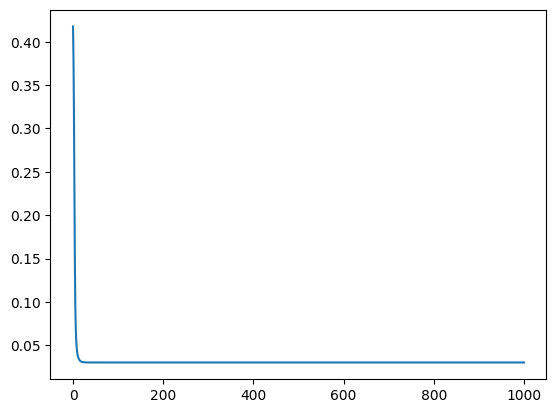

In [840]:
x = np.linspace(0, epochs, epochs)
y_l = np.array(l)
plt.plot(x, y_l)

In [841]:
y_p = nn.forward(blue_points[0])
y_p

array([[0.17343364, 0.82657587]])

In [615]:
def tanh_activation(x):
    return (np.exp(2*x) - 1)/(np.exp(2*x) + 1)

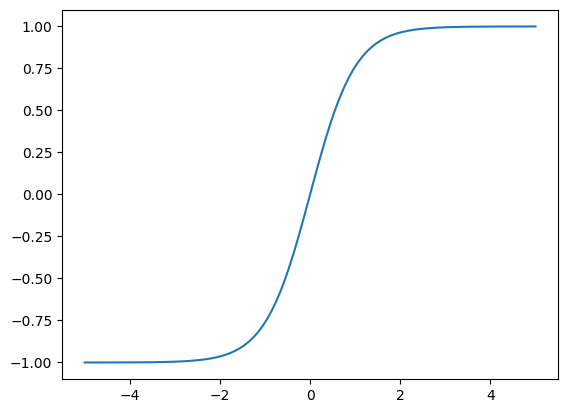

In [616]:
x = np.linspace(-5, 5, 100)
y = tanh_activation(x)
plt.plot(x, y)